# 3.3 Second-order filters

## 3.3.1 Electrical analogy of the second order system

Let's quickly make the comparison between analogous second order systems,  
just as we did for first order systems  
![image1!](./images_s3/image_3_3_1.png)  

$$mechanical\qquad\qquad\qquad\qquad electrical$$  
$$\sum{F}=0\qquad\qquad\qquad\qquad\sum{V}=0$$  
$$F_i+F_a+F_s-F_g=0\qquad\qquad\qquad\qquad V_L+V_R+V_C-V=0$$  
$$smv(s)+bv(s)+k\frac{v(s)}{s}=F_g(s)\qquad\qquad\qquad\qquad sLI(s)+RI(s)+\frac{I(s)}{sC}=V(s)$$  
$$(s^2m+sb+k)v(s)=sF_g(s)\qquad\qquad\qquad\qquad (s^2LC+sRC+1)I(s)=sCV(s)$$  
$$(s^2+\frac{b}{m}s+\frac{k}{m})v(s)=\frac{sF_g(s)}{m}\qquad\qquad\qquad\qquad (s^2+s\frac{R}{L}+\frac{1}{LC})I(s)=\frac{sV(s)}{L}$$  
$$\frac{v(s)}{F_g(s)}=\frac{\frac{s}{m}}{s^2+\frac{b}{m}s+\frac{k}{m}}\qquad\qquad\qquad\qquad\frac{I(s)}{V(s)}=\frac{\frac{s}{L}}{s^2+\frac{R}{L}s+\frac{1}{LC}}$$
![image2!](./images_s3/image_3_3_2.png)  

## 3.3.2 RLC Filters

You can see the power conjugate variables for the two systems behave exactly the same  
Although you can compute the portion of the force due to inertia, air drag, or the spring,  
it is much more common in electronics, to compute the voltage across the inductor, resistor, or capacitor  
  
Because we know the current, it is easy to calculate the voltages using "Ohm's law", $V=IZ$  
  
transfer function for $V_{inductor}$
$$H_L(s)=\frac{V_L}{V}=\frac{I}{V}\cdot\frac{V_L}{I}=\frac{\frac{s}{L}}{s^2+\frac{R}{L}s+\frac{1}{LC}}\cdot sL=\frac{s^2}{s^2+\frac{R}{L}s+\frac{1}{LC}}$$  
transfer function for $V_{resistor}$
$$H_R(s)=\frac{V_R}{V}=\frac{I}{V}\cdot\frac{V_R}{I}=\frac{\frac{s}{L}}{s^2+\frac{R}{L}s+\frac{1}{LC}}\cdot R=\frac{s\frac{R}{L}}{s^2+\frac{R}{L}s+\frac{1}{LC}}$$  
transfer function for $V_{capacitor}$
$$H_C(s)=\frac{V_C}{V}=\frac{I}{V}\cdot\frac{V_C}{I}=\frac{\frac{s}{L}}{s^2+\frac{R}{L}s+\frac{1}{LC}}\cdot \frac{1}{sC}=\frac{\frac{1}{LC}}{s^2+\frac{R}{L}s+\frac{1}{LC}}$$  
  
Each transfer function is a polynomial over a polynomial and has exactly the same denominator  
Of course, the voltages across each element, as well as the current, will all have the same natural frequencies  
The difference is in the numerators  

## 3.3.3 Transfer function poles and zeros on the s-plane

We have learned that the roots of the polynomial of the denominator are called the poles,  
also known as the natural frequencies of the system  
  
Roots are the values of s that cause the denominator to become 0  
If the denominator is zero, the transfer function blows up to infinity; that's why it's called a pole  
  
If the numerator is zero, the transfer function itself is zero  
The values of s that make the numerator zero are called the zeros of the system  
  
If the polynomials in the numerator and denominator are factored,  
then a general expression for the transfer function can be written as  
  
$$H(s)=K\frac{(s-z_0)(s-z_1)(s-z_2)\cdots}{(s-p_0)(s-p_1)(s-p_2)\cdots}$$  
  
This is called the zpk form  
  
The numerator of the resistor's transfer function has a first order polynomial - 1 zero  
The denominator of the resistor's transfer function has a second order polynomial - 2 poles  
  
$$H_R(s)=K\frac{s-z_0}{(s-p_0)(s-p_1)}=\frac{R}{L}\frac{(s-0)}{\left(s-\frac{-R}{2L}-\sqrt{\frac{R^2}{4L^2}-\frac{1}{LC}}\right)\left(s-\frac{-R}{2L}+\sqrt{\frac{R^2}{4L^2}-\frac{1}{LC}}\right)}$$
  
However, take the limit of the resistor's transfer function as $s\rightarrow\infty$  
Use L'Hopital's rule
$$\lim_{s\to\infty} H_R(s)=\lim_{s\to\infty}\frac{\frac{R}{L}}{2s+\frac{R}{L}}=0$$  
  
There is actually another zero at $s\rightarrow\infty$  
  
A transfer function always has the same number of poles and zeros,  
if you count all the poles and zeros as $s\rightarrow\infty$  
  
Sometimes there are repeated zeros,  
In the case of $H_C(s)$, there are two zeros as $s\rightarrow\infty$  

## 3.3.4 Create an example RLC circuit and plot the poles and zeros on the s-plane  
  
Make $L=100mH$, $R=150\Omega$, and $C=20\mu F$  
For the plot, let's choose the voltage across the resistor  
  
  
Poles are always plotted with the symbol x  
and zeros are plotted with symbol o

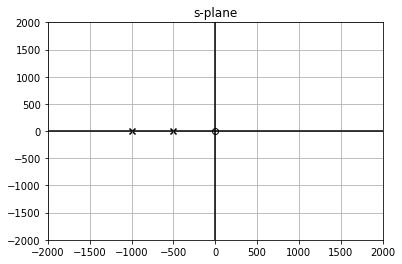

In [1]:
import scipy.signal as sig
import matplotlib.pyplot as plt

# enter the constants - all units must be SI units
R = 150 # Ohms
L = 100e-3 # Henrys
C = 20e-6 # Farads

# create the lti system for H_R(s)
num = [R/L, 0] # don't forget the zero
den = [1, R/L, 1/(L*C)]

H_R_s = sig.lti(num, den)

# plot the poles on the complex plane
plt.scatter(H_R_s.poles.real, H_R_s.poles.imag, marker='x', color = 'k')

# plot the poles on the complex plane
plt.plot(H_R_s.zeros.real, H_R_s.zeros.imag, marker='o', color = 'black', fillstyle = 'none')

plt.xlim([-2000,2000])
plt.ylim([-2000,2000])
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('s-plane')
plt.grid()

## 3.3.5 Viewing the transfer function as a 3D plot versus the s-plane

The poles and zeros are vaules of s, and values of s can be plotted on the s-plane,  
but the actual transfer function, H(s), is a function of s and must be plotted in the third dimension  
  
H(s) is a complex number, so it requires two graphs to plot it  
The example below will only show the magnitude plot, and not the phase plot

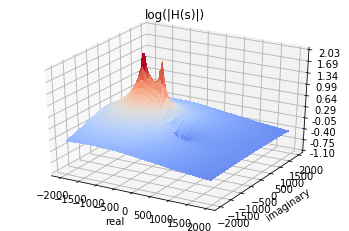

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def H_of_s(s):
    H = (R/L)*s/(s**2+(R/L)*s+1/(L*C))
    H_mag = np.log10(np.absolute(H))
    return H_mag

# Make s-plane
alpha = np.arange(-1980, 1980, 40)
omega = np.arange(-1980, 1980, 40)
alpha, omega = np.meshgrid(alpha, omega)
s = alpha + 1j * omega

# Make H(s)
H_mag = H_of_s(s)

# Create plotting objects
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface for magnitude of H(s).
ax.plot_surface(alpha, omega, H_mag, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Label the x and y axes
ax.set(xlabel='real', ylabel='imaginary', title='log(|H(s)|)')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

In this example, we plotted the log of the magnitude of H(s) versus the s-plane  
you can see the two poles along the negative real axis at -500[Np/s] and 1000[Np/s]  
  
You should also notice the zero at $s=0$  
A zero is like an upside down pole on the log scale, because $log(0)\rightarrow-\infty$

## 3.3.6 The Bode plot is H(s) along the positive imaginary axis

In the next plot, we will add a line that equals |H(s)| along the positive imaginary axis  
The line is not new information, it is the same data as |H(s)| in the 3D plot,  
The line is just highlighting the magnitude Bode plot  

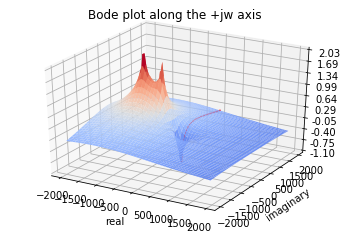

In [3]:
# make a new set of s values along the jw axis
jw = 20+1j * np.arange(20, 1980, 40)

# make the Bode plot, for s = +jw
Bode = H_of_s(jw)

# Create plotting objects
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface for magnitude of H(s).
ax.plot_surface(alpha, omega, H_mag, cmap=cm.coolwarm, zorder=1)

# Plot the line for magnitude of H(s) when s = +jw.
ax.plot3D(49*[20], np.abs(jw), Bode, color='red', zorder=2)

# Label the x and y axes
ax.set(xlabel='real', ylabel='imaginary', title='Bode plot along the +jw axis')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

## 3.3.7 Create the Bode plot using an lti object

In the plot above, the portion of |H(s)| along the $j\omega$ axis is the Bode plot,  
but it is graphed on a log-linear scale because the s-plane contains all four quadrants  
You can't take the log of negative numbers, so it's only possible to graph the first quadrant on a log scale  
  
The plot below is unusual because it shows the Bode plot on the same log-linear scale used in the 3D plot  
You should be able to recognize the shape of the Bode plot below, as seen in the 3D graph above  

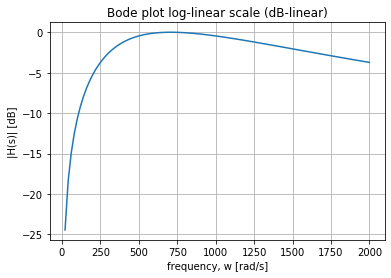

In [4]:
w = np.linspace(20, 2000, 100)
w, mag, phase = H_R_s.bode(w=w)

plt.plot(w, mag)
plt.xlabel('frequency, w [rad/s]')
plt.ylabel('|H(s)| [dB]')
plt.title('Bode plot log-linear scale (dB-linear)')
plt.grid()

The following plot shows the same exact Bode plot on a log-log scale (dB-log scale)

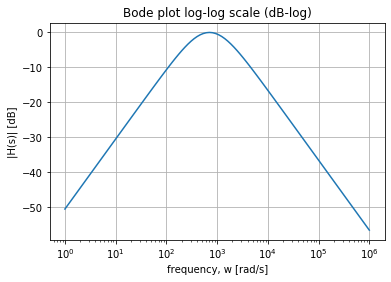

In [5]:
w = np.logspace(0, 6, 100)
w, mag, phase = H_R_s.bode(w=w)

plt.plot(w, mag)
plt.xscale('log')
plt.xlabel('frequency, w [rad/s]')
plt.ylabel('|H(s)| [dB]')
plt.title('Bode plot log-log scale (dB-log)')
plt.grid()

## 3.3.8 Bandpass, high-pass, and low-pass filters, the location of the zeros

The Bode plot above, shows that $H_R(s)$ is a bandpass filter  
  
The numerator for $H_R(s)$ is $s\frac{R}{L}$, so there is one zero at $s=0$ and another at $s\to\infty$  
  
You should recognize the resistor's transfer function as a bandpass filter  
You should see the slope on each side of the frequency band as +20[dB/decade] or -20[dB/decade]  
  
A slope of +20[dB/decade] means the signal is proportial to frequency, $H(s)\backsim s,\;or\backsim j\omega,\;or\backsim f$  
while a slope of -20[dB/decade] means the signal is inversly proportial to frequency, $H(s)\backsim\frac{1}{s},\;or\backsim\frac{1}{j\omega},\;or\backsim\frac{1}{f}$  
  
The magnitude of the poles; $s=-500$[Np/s] and $s=-1000$[Np/s], defines the two cut-off frequencies  
  
If the voltage across or current through a resistor is reduced by -3[dB],  
then the power dissipated by the resistor is one half  
That's how the cut-off frequencies are defined, by the half power point  
  
The magnitude of $H(s)$ at $s=j500$ is $H(j500)=-3$[db],  
similarly the magnitude at $s=j1000$ is $H(j1000)=-3$[db]  

The inductors transfer function  
The code cell below finds the Bode plot for $H_L(s)$

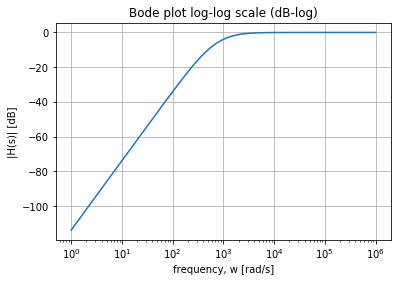

In [6]:
# enter the constants - all units must be SI units
R = 150 # Ohms
L = 100e-3 # Henrys
C = 20e-6 # Farads

# create the lti system for H_L(s)
num = [1, 0, 0] # don't forget the zeros
den = [1, R/L, 1/(L*C)]

H_L_s = sig.lti(num, den)

w = np.logspace(0, 6, 100)
w, mag, phase = H_L_s.bode(w=w)

plt.plot(w, mag)
plt.xscale('log')
plt.xlabel('frequency, w [rad/s]')
plt.ylabel('|H(s)| [dB]')
plt.title('Bode plot log-log scale (dB-log)')
plt.grid()

$H_L(s)$ is a high-pass filter  
  
The numerator for $H_L(s)$ is $s^2$, so there are two zeros at $s=0$,  
This causes the transfer function to greatly diminish signals below the cut-off frequencies  
  
A slope of +40[dB/decade] means the signal is proportial to frequency squared, $H(s)\backsim s^2,\;or\backsim (j\omega)^2,\;or\backsim f^2$  
  
Again, the magnitude of the poles; $s=-500$[Np/s] and $s=-1000$[Np/s], which defines the two cut-off frequencies  
  
The two poles are too close together to see the individual contribution,  
but the magnitude of $H(s)$ below $s=j1000$ starts to drop by 20[dB/decade]  
and the magnitude below $s=j500$ drops by 40[dB/decade]  

The capacitors transfer function  
The code cell below finds the Bode plot for $H_C(s)$

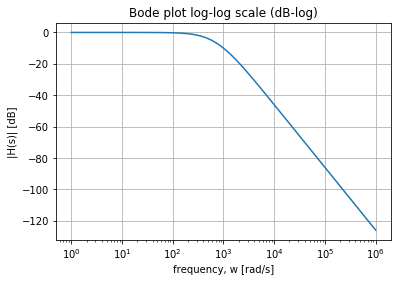

In [7]:
# enter the constants - all units must be SI units
R = 150 # Ohms
L = 100e-3 # Henrys
C = 20e-6 # Farads

# create the lti system for H_C(s)
num = [1/(L*C)]
den = [1, R/L, 1/(L*C)]

H_C_s = sig.lti(num, den)

w = np.logspace(0, 6, 100)
w, mag, phase = H_C_s.bode(w=w)

plt.plot(w, mag)
plt.xscale('log')
plt.xlabel('frequency, w [rad/s]')
plt.ylabel('|H(s)| [dB]')
plt.title('Bode plot log-log scale (dB-log)')
plt.grid()

$H_C(s)$ is a low-pass filter  
  
The numerator for $H_C(s)$ is $\frac{1}{LC}$, so both zeros end up at $s\to\infty$,  
This causes the transfer function to greatly diminish the signals above the cut-off frequencies  
  
A slope of -40[dB/decade] means the signal is inversly proportial to frequency squared, $H(s)\backsim\frac{1}{s^2},\;or\backsim\frac{1}{(j\omega)^2},\;or\backsim\frac{1}{f^2}$  
  
The denominator is still the same, as it is for all transfer functions in the RLC system,  
the magnitude of the poles; $s=-500$[Np/s] and $s=-1000$[Np/s] defines the two cut-off frequencies  
  
The two poles are too close together to see the individual contribution,  
but the magnitude of $H(s)$ above $s=j500$ starts to drop by -20[dB/decade]  
and the magnitude above $s=j1000$ drops by -40[dB/decade]  

## 3.3.9 Varying the location of the poles; underdamped, critically damped, and overdamped

In our example above the RLC system was overdamped, containing two real but different poles  
The poles were at $s=-500$[Np/s] and $s=-1000$[Np/s]  
  
If we increase the resistance of this system, we will increase the damping  
We can move the poles very far apart, by increasing the resistance to $R=1005\Omega$  
  
In the figure below, the poles are far enough apart  
so you can see the effect of the two poles individually  
  
Very overdamped

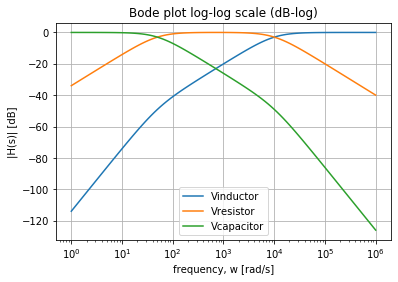

In [8]:
# enter the constants - all units must be SI units
R = 1005 # Ohms
L = 100e-3 # Henrys
C = 20e-6 # Farads

# create the lti systems
num_L = [1, 0, 0] # don't forget the zeros
num_R = [R/L, 0] # don't forget the zero
num_C = [1/(L*C)]
den = [1, R/L, 1/(L*C)]

H_L_s = sig.lti(num_L, den)
H_R_s = sig.lti(num_R, den)
H_C_s = sig.lti(num_C, den)

w = np.logspace(0, 6, 100)
w, mag_L, phase = H_L_s.bode(w=w)
w, mag_R, phase = H_R_s.bode(w=w)
w, mag_C, phase = H_C_s.bode(w=w)

plt.plot(w, mag_L)
plt.plot(w, mag_R)
plt.plot(w, mag_C)
plt.legend(['Vinductor', 'Vresistor', 'Vcapacitor'])
plt.xscale('log')
plt.xlabel('frequency, w [rad/s]')
plt.ylabel('|H(s)| [dB]')
plt.title('Bode plot log-log scale (dB-log)')
plt.grid()

The condition for the critically damped case is when the two roots are real and equal,  
which is found from the quadratic equation when $\sqrt{b^2-4ac}=0$  
For this system we need to reduce the resistance to $\left(\frac{R}{L}\right)^2=4\left(\frac{1}{LC}\right)$, or $R=141\Omega$  
  
Critically damped

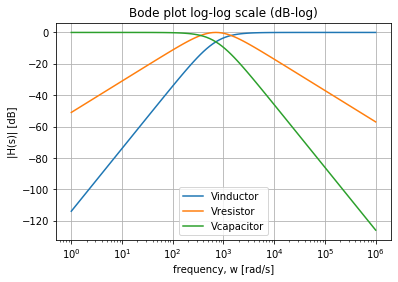

In [9]:
# enter the constants - all units must be SI units
R = 141 # Ohms
L = 100e-3 # Henrys
C = 20e-6 # Farads

# create the lti systems
num_L = [1, 0, 0] # don't forget the zeros
num_R = [R/L, 0] # don't forget the zero
num_C = [1/(L*C)]
den = [1, R/L, 1/(L*C)]

H_L_s = sig.lti(num_L, den)
H_R_s = sig.lti(num_R, den)
H_C_s = sig.lti(num_C, den)

w = np.logspace(0, 6, 100)
w, mag_L, phase = H_L_s.bode(w=w)
w, mag_R, phase = H_R_s.bode(w=w)
w, mag_C, phase = H_C_s.bode(w=w)

plt.plot(w, mag_L)
plt.plot(w, mag_R)
plt.plot(w, mag_C)
plt.legend(['Vinductor', 'Vresistor', 'Vcapacitor'])
plt.xscale('log')
plt.xlabel('frequency, w [rad/s]')
plt.ylabel('|H(s)| [dB]')
plt.title('Bode plot log-log scale (dB-log)')
plt.grid()

In the final case we want to look at, we are going to reduce the resistor to $R=7\Omega$  
Now, there is very little damping in the system   
  
A very peculiar phenomenon occurs.  The gain of the transfer function increases above 1 (0[dB])  
This is called gain peaking and we will study it next  

For critical and underdamping, the poles are equal or complex conjugates,  
so the magnitudes of the poles are all the same, which is called the natural frequency, $\omega_n$  
In our example, that's 707[rad/s] and this is where the gain peaking occurs  
  
Very underdamped

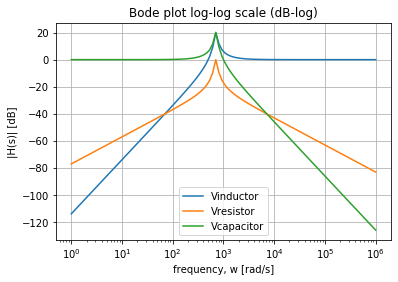

In [10]:
# enter the constants - all units must be SI units
R = 7 # Ohms
L = 100e-3 # Henrys
C = 20e-6 # Farads

# create the lti systems
num_L = [1, 0, 0] # don't forget the zeros
num_R = [R/L, 0] # don't forget the zero
num_C = [1/(L*C)]
den = [1, R/L, 1/(L*C)]

H_L_s = sig.lti(num_L, den)
H_R_s = sig.lti(num_R, den)
H_C_s = sig.lti(num_C, den)

w = np.logspace(0, 6, 100)
w, mag_L, phase = H_L_s.bode(w=w)
w, mag_R, phase = H_R_s.bode(w=w)
w, mag_C, phase = H_C_s.bode(w=w)

plt.plot(w, mag_L)
plt.plot(w, mag_R)
plt.plot(w, mag_C)
plt.legend(['Vinductor', 'Vresistor', 'Vcapacitor'])
plt.xscale('log')
plt.xlabel('frequency, w [rad/s]')
plt.ylabel('|H(s)| [dB]')
plt.title('Bode plot log-log scale (dB-log)')
plt.grid()

## 3.3.10 The general topologies of the RLC circuit

The arrangement of R, L, and C in RLC circuits can be varied in many ways  
The particular arrangement is called the circuit topology  
  
Some of the more common RLC circuit topolgies are shown below  
  
![image3!](./images_s3/image_3_3_3.png)  